In [ ]:
#!pip install torch torchvision
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from sklearn.metrics import roc_curve, auc
import timm
import io
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.layers import Input, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
vit_models = [model for model in timm.list_models() if 'vit_' in model.lower()]
print(vit_models)

['convit_base', 'convit_small', 'convit_tiny', 'crossvit_9_240', 'crossvit_9_dagger_240', 'crossvit_15_240', 'crossvit_15_dagger_240', 'crossvit_15_dagger_408', 'crossvit_18_240', 'crossvit_18_dagger_240', 'crossvit_18_dagger_408', 'crossvit_base_240', 'crossvit_small_240', 'crossvit_tiny_240', 'davit_base', 'davit_giant', 'davit_huge', 'davit_large', 'davit_small', 'davit_tiny', 'efficientvit_b0', 'efficientvit_b1', 'efficientvit_b2', 'efficientvit_b3', 'efficientvit_l1', 'efficientvit_l2', 'efficientvit_l3', 'efficientvit_m0', 'efficientvit_m1', 'efficientvit_m2', 'efficientvit_m3', 'efficientvit_m4', 'efficientvit_m5', 'fastvit_ma36', 'fastvit_s12', 'fastvit_sa12', 'fastvit_sa24', 'fastvit_sa36', 'fastvit_t8', 'fastvit_t12', 'flexivit_base', 'flexivit_large', 'flexivit_small', 'gcvit_base', 'gcvit_small', 'gcvit_tiny', 'gcvit_xtiny', 'gcvit_xxtiny', 'levit_128', 'levit_128s', 'levit_192', 'levit_256', 'levit_256d', 'levit_384', 'levit_384_s8', 'levit_512', 'levit_512_s8', 'levit_512

In [ ]:
tf.keras.utils.set_random_seed(12)

batch_size = 32
img_height = img_width =224

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = "/content/drive/MyDrive/data_3/train"
test = "/content/drive/MyDrive/data_3/test"

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    #class_names=None,
    shuffle=True,
    seed=12,
    validation_split= 0.15,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2400 files belonging to 2 classes.
Using 2040 files for training.


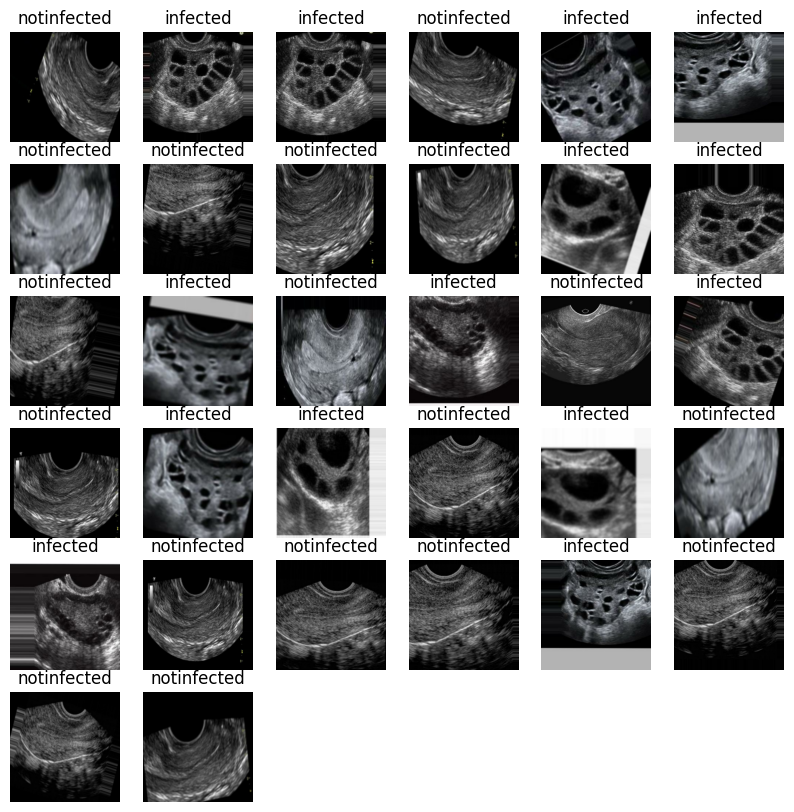

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
class_names = train_ds.class_names
for images, labels in train_ds.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [ ]:
# The desired result was not achieved
"""
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    #class_names=None,
    shuffle=True,
    seed=12,
    validation_split= 0.15,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    validation_split= 0.15,
    seed=12,
    subset="validation",
    image_size=(img_height, img_width),
    #label_mode="categorical",
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test,
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)
"""

# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             #width_shift_range=0.2,
                             #height_shift_range=0.2,
                             horizontal_flip = True,
                             vertical_flip=True,
                             rotation_range=20,
                             validation_split=0.2,
                             fill_mode='nearest'
                             )
# prepare an iterators for each dataset
train_ds = datagen.flow_from_directory(directory,
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=batch_size,
                                       subset='training',
                                       seed=12)
# prepare an iterators for each dataset
val_ds = datagen.flow_from_directory( directory,
                                       class_mode='categorical',
                                       classes=['infected', 'notinfected'],
                                       target_size=(224, 224),
                                       batch_size=batch_size,
                                       subset='validation',
                                       seed=12)


Found 1920 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test,
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 244 files belonging to 2 classes.


In [ ]:
"""
model = Sequential()

model.add(Conv2D(12, (5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(8, (5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))

model.add(Conv2D(4, (5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(2,activation='softmax'))

opt=Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])
"""

"\nmodel = Sequential()\n\nmodel.add(Conv2D(12, (5,5),padding='SAME',activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n#model.add(Dropout(0.1))\n\nmodel.add(Conv2D(8, (5,5),padding='SAME',activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n#model.add(Dropout(0.1))\n\nmodel.add(Conv2D(4, (5,5),padding='SAME',activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Flatten())\n\nmodel.add(Dense(2,activation='softmax'))\n\nopt=Adam(learning_rate=0.01)\nmodel.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])\n"

In [ ]:
# Define the Vision Transformer model
class UltrasoundViT(nn.Module):
    def __init__(self, num_classes=2, model_name='vit_large_patch16_224'):
        super(UltrasoundViT, self).__init__()
        self.model = timm.create_model(model_name, pretrained=True)
        self.model.head = nn.Linear(self.model.head.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

In [ ]:
# Create model, loss function, and optimizer
model = UltrasoundViT()
criterion = nn.CrossEntropyLoss(ignore_index=-1)  # Ignore placeholder labels during loss calculation
optimizer = optim.Adam(model.parameters(), lr=0.001)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

UltrasoundViT(
  (model): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (patch_drop): Identity()
    (norm_pre): Identity()
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1024, out_features=3072, bias=True)
          (q_norm): Identity()
          (k_norm): Identity()
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=1024, out_features=1024, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): Identity()
        (drop_path1): Identity()
        (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (act): GELU(approximate

In [ ]:
#earlyStopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1,patience=15)

class EarlyStopping:
    def __init__(self, patience=5, delta=0, verbose=False):
        self.patience = patience
        self.delta = delta
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def step(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0
        return self.early_stop


In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Define the transform to be applied to each image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

# Define the paths to the train and validation directories
train_dir = directory
val_dir = test

# Create the datasets
train_ds = ImageFolder(train_dir, transform=transform)
val_ds = ImageFolder(val_dir, transform=transform)

# Create the data loaders
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size)


In [ ]:
"""
history = model.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[earlyStopping],
    batch_size=batch_size,
    verbose=1,
    epochs=20)
    """

'\nhistory = model.fit(\n    train_ds,\n    validation_data=val_ds,\n    callbacks=[earlyStopping],\n    batch_size=batch_size,\n    verbose=1,\n    epochs=20)\n    '

In [ ]:
import torch

def fit_model(model, criterion, optimizer, train_loader, val_loader, early_stopping=None, num_epochs=20):
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = train_loss / len(train_loader.dataset)
        train_accuracy = correct / total
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_accuracy)

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader.dataset)
        val_accuracy = correct / total
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2%}, "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2%}")

        # Check for early stopping
        if early_stopping is not None:
            if early_stopping.step(val_loss):
                print("Early stopping triggered.")
                break

    return history

# Usage
#history = fit_model(model, criterion, optimizer, train_loader, val_loader, early_stopping, num_epochs=20)


In [ ]:
# Train the model
"""
for images, labels in train_loader:
    print(images.shape)  # Check the shape of the input images
    print(labels.shape)  # Check the shape of the labels
    break  # Exit the loop after printing the shapes of the first batch
"""
early_stopping = EarlyStopping(patience=5, verbose=True)

history = fit_model(model, criterion, optimizer, train_loader, val_loader, early_stopping, num_epochs=20)

Epoch [1/20], Train Loss: 1.6097, Train Accuracy: 52.46%, Val Loss: 0.7923, Val Accuracy: 50.00%
Epoch [2/20], Train Loss: 0.7025, Train Accuracy: 57.29%, Val Loss: 0.5045, Val Accuracy: 79.92%
Epoch [3/20], Train Loss: 0.2947, Train Accuracy: 86.25%, Val Loss: 0.1722, Val Accuracy: 93.03%
Epoch [4/20], Train Loss: 0.0791, Train Accuracy: 97.08%, Val Loss: 0.0600, Val Accuracy: 98.36%
Epoch [5/20], Train Loss: 0.0254, Train Accuracy: 99.25%, Val Loss: 0.0760, Val Accuracy: 98.77%
EarlyStopping counter: 1 out of 5
Epoch [6/20], Train Loss: 0.0539, Train Accuracy: 98.42%, Val Loss: 0.0619, Val Accuracy: 97.95%
EarlyStopping counter: 2 out of 5
Epoch [7/20], Train Loss: 0.0067, Train Accuracy: 99.75%, Val Loss: 0.0711, Val Accuracy: 99.18%
EarlyStopping counter: 3 out of 5
Epoch [8/20], Train Loss: 0.0003, Train Accuracy: 100.00%, Val Loss: 0.0776, Val Accuracy: 99.18%
EarlyStopping counter: 4 out of 5
Epoch [9/20], Train Loss: 0.0001, Train Accuracy: 100.00%, Val Loss: 0.0841, Val Accura

In [ ]:
#model.summary()
from torchsummary import summary

# Assuming model is an instance of UltrasoundViT
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Print the summary of the model
summary(model, input_size=(3, 224, 224))  # Adjust input_size according to your input image shape


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 1024, 14, 14]         787,456
          Identity-2            [-1, 196, 1024]               0
        PatchEmbed-3            [-1, 196, 1024]               0
           Dropout-4            [-1, 197, 1024]               0
          Identity-5            [-1, 197, 1024]               0
          Identity-6            [-1, 197, 1024]               0
         LayerNorm-7            [-1, 197, 1024]           2,048
            Linear-8            [-1, 197, 3072]       3,148,800
          Identity-9          [-1, 16, 197, 64]               0
         Identity-10          [-1, 16, 197, 64]               0
           Linear-11            [-1, 197, 1024]       1,049,600
          Dropout-12            [-1, 197, 1024]               0
        Attention-13            [-1, 197, 1024]               0
         Identity-14            [-1, 19

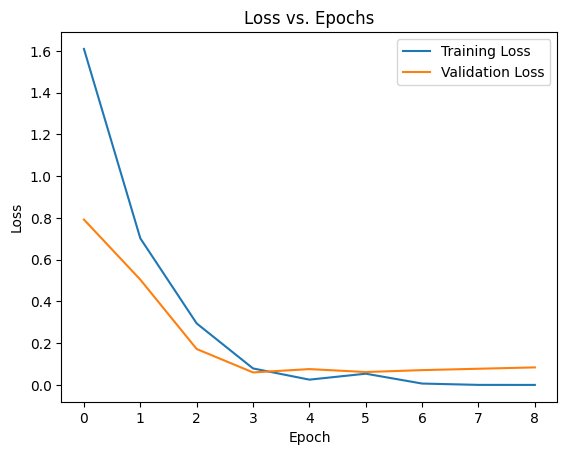

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have history dictionary returned from the fit_model function

# Plot the training and validation loss
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


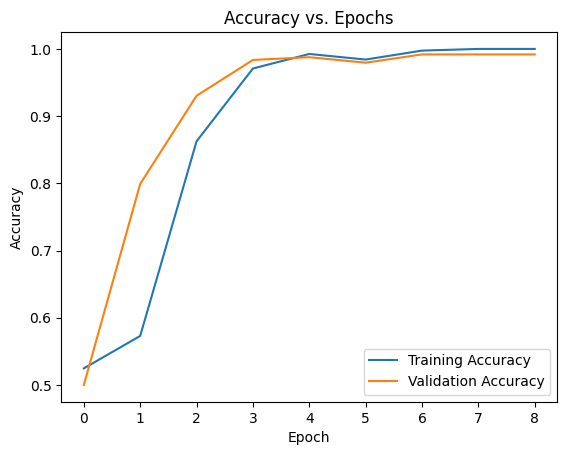

In [ ]:

# Plot the training and validation accuracy
plt.plot(history['train_acc'], label='Training Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
def evaluate_model(model, criterion, val_loader, device):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = correct / total

    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2%}")

# Usage
evaluate_model(model, criterion, val_loader, device)


Validation Loss: 0.0841, Validation Accuracy: 99.18%


In [ ]:
# Define the file path where you want to save the model in your Google Drive
model_path = '/content/drive/My Drive/model_vit_large_patch16_224.pth'

# Save the model
torch.save(model.state_dict(), model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/model_vit_large_patch16_224.pth


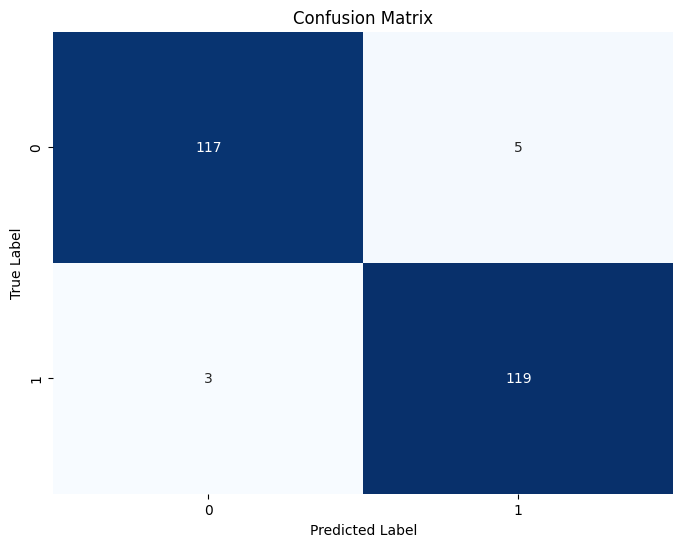

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.96      0.97       122
     Class 1       0.96      0.98      0.97       122

    accuracy                           0.97       244
   macro avg       0.97      0.97      0.97       244
weighted avg       0.97      0.97      0.97       244



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Evaluate the model on validation data to get predictions
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report
class_names = ['Class 0', 'Class 1']  # Adjust class names as needed
report = classification_report(y_true, y_pred, target_names=class_names)

# Print classification report
print("Classification Report:")
print(report)


In [ ]:
"""
# Load the model
model_path = '/content/drive/My Drive/model_vit_large_patch16_224.pth'
model = UltrasoundViT()  # Assuming UltrasoundViT is your model class
model.load_state_dict(torch.load(model_path))
#model.eval()  # Set the model to evaluation mode after loading
"""
# Load the model(CPU)
model_path = '/content/drive/My Drive/model_vit_large_patch16_224.pth'
model = UltrasoundViT()  # Assuming UltrasoundViT is your model class
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))



<All keys matched successfully>

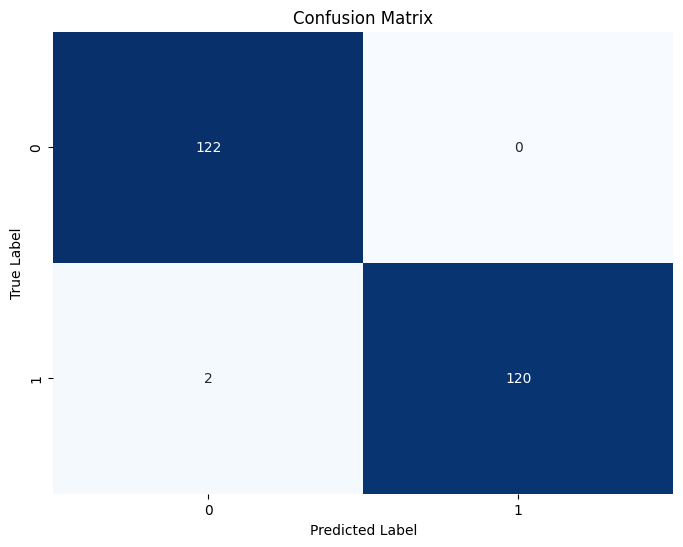

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99       122
     Class 1       1.00      0.98      0.99       122

    accuracy                           0.99       244
   macro avg       0.99      0.99      0.99       244
weighted avg       0.99      0.99      0.99       244



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Evaluate the model on validation data to get predictions
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report
class_names = ['Class 0', 'Class 1']  # Adjust class names as needed
report = classification_report(y_true, y_pred, target_names=class_names)

# Print classification report
print("Classification Report:")
print(report)


In [ ]:
# Assuming you have loaded your pre-trained model named `model`

# Optionally, freeze layers if needed
for param in model.parameters():
    param.requires_grad = False  # Freeze all parameters

# Replace classifier head
model.model.head = nn.Linear(model.model.head.in_features, 2)  # Assuming num_classes is the number of classes in your dataset

# Move model to appropriate device
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10  # Adjust as needed
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.2%}")

# Evaluate the model
model.eval()
evaluate_model(model, criterion, val_loader, device)


Epoch [1/10], Train Loss: 0.0378, Train Accuracy: 99.12%
Epoch [2/10], Train Loss: 0.0332, Train Accuracy: 99.21%
Epoch [3/10], Train Loss: 0.0294, Train Accuracy: 99.29%
Epoch [4/10], Train Loss: 0.0265, Train Accuracy: 99.25%
Epoch [5/10], Train Loss: 0.0305, Train Accuracy: 99.08%
Epoch [6/10], Train Loss: 0.0290, Train Accuracy: 99.29%
Epoch [7/10], Train Loss: 0.0283, Train Accuracy: 99.25%
Epoch [8/10], Train Loss: 0.0351, Train Accuracy: 99.04%
Epoch [9/10], Train Loss: 0.0353, Train Accuracy: 99.12%
Epoch [10/10], Train Loss: 0.0266, Train Accuracy: 99.21%
Validation Loss: 0.0746, Validation Accuracy: 97.95%
